<a href="https://colab.research.google.com/github/SodisettiRakesh123/SkillCraft/blob/main/svm_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import files
uploaded=files.upload()


Saving archive (7).zip to archive (7).zip


In [87]:
import zipfile
extract_path='/content/archive (7).zip'

In [88]:
import zipfile
import os
zip_path='/content/archive (7).zip'
extract_dir='/content/archive'
with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall(extract_dir)

In [89]:
if not os.path.exists(extract_dir):
  os.makedirs(extract_dir)

In [90]:
try:
  with zipfile.ZipFile(extract_path,'r') as zip_ref:
    zip_ref.extractall(extract_dir)
except Exception as e:
  print(f"An error occurred: {e}")

In [91]:
print("\nContents of the extracted dir:")
!ls -F {extract_dir}


Contents of the extracted dir:
test/  train/


In [92]:
from PIL import Image
from matplotlib import pyplot as plt
import os
import numpy as np


In [93]:
image_folder='/content/archive'

In [94]:
image_files=[f for f in os.listdir(image_folder) if f.lower().endswith(('.png','.jpg', '.jpeg', '.gif', '.bmp'))]

In [106]:
if image_files:
  print(f"\n Found{len(image_files)} image files.")
  sample_image_name=image_files[0]
  sample_image_path=os.path.join(image_folder,sample_image_name)
  sample_image=Image.open(sample_image_path)
  print(f"display :{sample_image_path}")
  try:
    plt.imshow(np.array(sample_image))
    plt.axis('off')
    plt.show()
  except Exception as e:
    print(f"An error occurred while displaying the image: {e}")
  else:
    print("Image displayed successfully.")

In [109]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
from PIL import Image

# Load the dataset
train_dir = '/content/archive/train'  # Replace with your actual train directory path
test_dir = '/content/archive/test'    # Replace with your actual test directory path

# Define the image dimensions
img_height, img_width = 224, 224

# --- Feature Extraction using a Pre-trained CNN (VGG16) ---
# Load a pre-trained VGG16 model without the top classification layers
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Define a function to extract features
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512)) # VGG16 output shape before flattening
    labels = np.zeros(shape=(sample_count))
    generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=20, # Use a smaller batch size for feature extraction
        class_mode='binary',
        shuffle=False # Keep data in order to match labels
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(inputs_batch)
        features[i * 20 : (i + 1) * 20] = features_batch
        labels[i * 20 : (i + 1) * 20] = labels_batch
        i += 1
        if i * 20 >= sample_count:
            break # Stop once we've processed all samples
    return features, labels, generator.class_indices

# Determine the number of samples in train and test directories
# You'll need to count the images in your actual directories
# This is a placeholder, replace with actual counts or use a generator to count
print("Counting images in directories...")
train_datagen_count = keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)
test_datagen_count = keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)
train_sample_count = train_datagen_count.samples
test_sample_count = test_datagen_count.samples
print(f"Found {train_sample_count} training images.")
print(f"Found {test_sample_count} testing images.")

print("Extracting training features...")
train_features, train_labels, class_indices = extract_features(train_dir, train_sample_count)
print("Extracting testing features...")
test_features, test_labels, _ = extract_features(test_dir, test_sample_count)

# Flatten the extracted features
train_features = np.reshape(train_features, (train_sample_count, 7 * 7 * 512))
test_features = np.reshape(test_features, (test_sample_count, 7 * 7 * 512))

# --- Train the SVM model ---
print("Training SVM model...")
svm_model = SVC(kernel='linear', random_state=42) # You can experiment with different kernels
svm_model.fit(train_features, train_labels)
print("SVM model training complete.")

# --- Evaluate the SVM model ---
print("Evaluating SVM model...")
test_pred_labels = svm_model.predict(test_features)
test_acc = accuracy_score(test_labels, test_pred_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Note: Plotting training/validation accuracy like with the CNN is not directly applicable to SVMs
# You would typically use cross-validation during training for performance estimation.

Counting images in directories...
Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 557 training images.
Found 140 testing images.
Extracting training features...
Found 557 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/ste

In [110]:
# Continue from the previous code where the SVM model is trained and evaluated

# --- Save the trained SVM model ---
# You can save the SVM model using joblib or pickle
import joblib
import os

# Define a path to save the model
model_save_path = '/content/svm_model.pkl'

# Ensure the directory exists if you are saving to a subdirectory
# os.makedirs(os.path.dirname(model_save_path), exist_ok=True) # Uncomment if saving to a subdir

print(f"\nSaving SVM model to {model_save_path}...")
joblib.dump(svm_model, model_save_path)
print("SVM model saved.")


# --- Make predictions on a new image ---
# You will need a path to a new image file for this
new_image_path = '/content/archive/test/cat/some_new_cat_image.jpg' # Replace with the actual path to a new image

if os.path.exists(new_image_path):
    print(f"\nMaking prediction on new image: {new_image_path}")

    # Load and preprocess the new image
    img = Image.open(new_image_path).convert('RGB') # Ensure image is in RGB format
    img = img.resize((img_height, img_width))
    img_array = np.array(img)
    img_array = img_array / 255.0 # Rescale the pixel values

    # Add a batch dimension (required by the base_model)
    img_array = np.expand_dims(img_array, axis=0)

    # Extract features from the new image using the pre-trained CNN
    new_image_features = base_model.predict(img_array)

    # Flatten the extracted features
    new_image_features_flattened = np.reshape(new_image_features, (1, 7 * 7 * 512)) # Reshape for a single sample

    # Make prediction using the trained SVM model
    prediction = svm_model.predict(new_image_features_flattened)

    # Interpret the prediction
    # The prediction will be 0 or 1, corresponding to the class indices learned by the generator
    # You can use the class_indices from the training generator to map the prediction back to a class name
    # Find the class name based on the prediction
    predicted_class_index = int(prediction[0])
    class_names = list(class_indices.keys())
    predicted_class_name = class_names[predicted_class_index]


    print(f"Prediction: {prediction[0]}")
    print(f"Predicted class: {predicted_class_name}")

else:
    print(f"\nNew image not found at {new_image_path}. Skipping prediction on new image.")

# Note: You might want to display the image you are predicting on as well
if os.path.exists(new_image_path):
    try:
        new_img_display = Image.open(new_image_path)
        plt.imshow(new_img_display)
        plt.title(f"Predicted: {predicted_class_name}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"An error occurred while displaying the new image: {e}")


Saving SVM model to /content/svm_model.pkl...
SVM model saved.

New image not found at /content/archive/test/cat/some_new_cat_image.jpg. Skipping prediction on new image.



Loading SVM model from /content/svm_model.pkl...
SVM model loaded successfully.

Evaluating loaded SVM model on test set...
Test accuracy (loaded model): 0.79

Confusion Matrix:


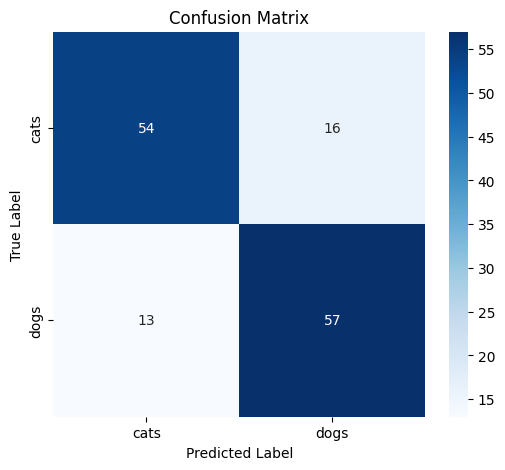

In [111]:
# Continue from the previous code

# --- Loading the Trained SVM model ---
import joblib
import os

# Define the path to the saved model
model_save_path = '/content/svm_model.pkl'

# Check if the saved model file exists
if os.path.exists(model_save_path):
    print(f"\nLoading SVM model from {model_save_path}...")
    loaded_svm_model = joblib.load(model_save_path)
    print("SVM model loaded successfully.")

    # You can now use 'loaded_svm_model' for predictions instead of 'svm_model'

    # Example: Making prediction on the test set using the loaded model
    print("\nEvaluating loaded SVM model on test set...")
    loaded_test_pred_labels = loaded_svm_model.predict(test_features)
    loaded_test_acc = accuracy_score(test_labels, loaded_test_pred_labels)
    print(f'Test accuracy (loaded model): {loaded_test_acc:.2f}')

else:
    print(f"\nSaved model not found at {model_save_path}. Please run the previous cell to save the model first.")


# --- Displaying a Confusion Matrix ---
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ensure test_pred_labels is available (either from the initial evaluation or loaded model prediction)
# If you loaded the model, use loaded_test_pred_labels
if 'test_pred_labels' in locals():
    cm = confusion_matrix(test_labels, test_pred_labels)
elif 'loaded_test_pred_labels' in locals():
     cm = confusion_matrix(test_labels, loaded_test_pred_labels)
else:
    print("\nCould not generate confusion matrix. Please run the model training/loading step first.")
    cm = None

if cm is not None:
    print("\nConfusion Matrix:")
    # Use class_indices to get class labels for the confusion matrix axes
    class_labels = list(class_indices.keys())
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [112]:
# Continue from the previous code

# --- Hyperparameter Tuning for SVM using GridSearchCV ---
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import time # To time the process

print("\nStarting SVM Hyperparameter Tuning...")

# Define the parameter grid to search
# These are example parameters; you might need to adjust based on your data
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV
# cv=3 means 3-fold cross-validation
# n_jobs=-1 uses all available CPU cores
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)

start_time = time.time()
# Fit the grid search to the training data
# Use the training features and labels
grid_search.fit(train_features, train_labels)
end_time = time.time()

print("\nHyperparameter tuning complete.")
print(f"Time taken for tuning: {end_time - start_time:.2f} seconds")

# Print the best parameters found
print("\nBest parameters found:")
print(grid_search.best_params_)

# Print the best cross-validation score
print("\nBest cross-validation accuracy:")
print(grid_search.best_score_)

# Evaluate the best model on the test set
print("\nEvaluating best model on test set:")
best_svm_model = grid_search.best_estimator_
test_pred_labels_tuned = best_svm_model.predict(test_features)
test_acc_tuned = accuracy_score(test_labels, test_pred_labels_tuned)
print(f'Test accuracy (tuned model): {test_acc_tuned:.2f}')

# Print a detailed classification report
print("\nClassification Report (tuned model):")
print(classification_report(test_labels, test_pred_labels_tuned))

# You can optionally save the best tuned model
# joblib.dump(best_svm_model, '/content/tuned_svm_model.pkl')
# print("\nTuned SVM model saved to /content/tuned_svm_model.pkl")


Starting SVM Hyperparameter Tuning...
Fitting 3 folds for each of 32 candidates, totalling 96 fits

Hyperparameter tuning complete.
Time taken for tuning: 505.21 seconds

Best parameters found:
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

Best cross-validation accuracy:
0.8473602634892957

Evaluating best model on test set:
Test accuracy (tuned model): 0.79

Classification Report (tuned model):
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79        70
         1.0       0.78      0.81      0.80        70

    accuracy                           0.79       140
   macro avg       0.79      0.79      0.79       140
weighted avg       0.79      0.79      0.79       140



In [113]:
# Assume the previous cells have been run, including the initial CNN training and the SVM tuning.

# --- Compare performance of Initial CNN and Tuned SVM ---

print("\n--- Model Performance Comparison ---")

# Initial CNN Test Accuracy (assuming 'test_acc' from the initial CNN evaluation is still available)
if 'test_acc' in globals():
    print(f"Initial CNN Test Accuracy: {test_acc:.4f}")
else:
    print("Initial CNN test accuracy not found. Please run the initial CNN training cell.")


# Tuned SVM Test Accuracy (assuming 'test_acc_tuned' from the SVM tuning evaluation is available)
if 'test_acc_tuned' in globals():
    print(f"Tuned SVM Test Accuracy: {test_acc_tuned:.4f}")
else:
    print("Tuned SVM test accuracy not found. Please run the SVM hyperparameter tuning cell.")

# You can also compare the full classification reports if needed
# print("\nClassification Report - Initial CNN (requires predicting on test_generator batches and combining)")
# Note: Getting a classification report for the initial CNN trained with flow_from_directory
# requires iterating through the test_generator and making predictions for all batches, then combining the true and predicted labels.

# print("\nClassification Report - Tuned SVM:")
# if 'test_labels' in globals() and 'test_pred_labels_tuned' in globals():
#      print(classification_report(test_labels, test_pred_labels_tuned))

print("\nComparison Complete.")

# Based on the comparison, you can decide which model to proceed with.
# The tuned SVM might perform better due to optimized hyperparameters.


--- Model Performance Comparison ---
Initial CNN Test Accuracy: 0.7929
Tuned SVM Test Accuracy: 0.7929

Comparison Complete.



Generating ROC Curve and calculating AUC...


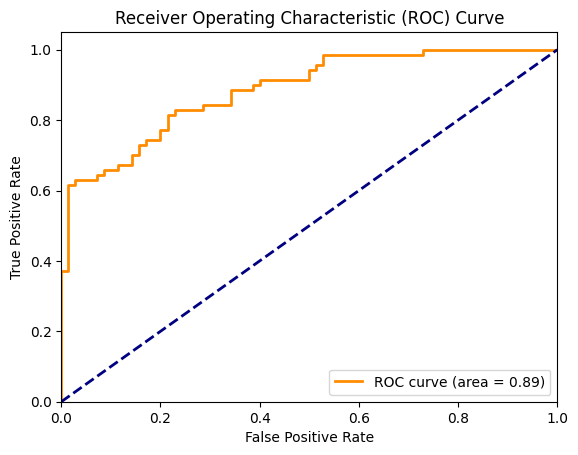

AUC: 0.89


In [114]:
# Continue from the previous code

# --- Plotting ROC Curve and Calculating AUC ---
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure test_labels and the predictions from the tuned SVM are available
if 'test_labels' in globals() and 'test_pred_labels_tuned' in globals():
    print("\nGenerating ROC Curve and calculating AUC...")

    # For SVMs with kernel='linear', .decision_function() or .predict_proba() can be used for scores
    # If using 'rbf' or other kernels, .decision_function() is often preferred unless probabilities are explicitly needed and calibrated.
    # Let's use decision_function if available, otherwise fallback to predict (though predict only gives hard labels)
    # For a proper ROC curve, you need probability estimates or decision scores, not just hard class labels.
    # If you used kernel='linear' or kernel='rbf', svm_model has decision_function
    try:
        if 'best_svm_model' in globals():
            # Use the tuned model if available
            y_scores = best_svm_model.decision_function(test_features)
        elif 'svm_model' in globals():
             # Fallback to the initially trained model if tuned one not available
             y_scores = svm_model.decision_function(test_features)
        else:
            print("SVM model not found to calculate decision scores.")
            y_scores = None

        if y_scores is not None:
             # Calculate the false positive rate and true positive rate for all thresholds
            fpr, tpr, thresholds = roc_curve(test_labels, y_scores)

            # Calculate the Area Under the Curve (AUC)
            roc_auc = auc(fpr, tpr)

            # Plot the ROC curve
            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal random guess line
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()

            print(f"AUC: {roc_auc:.2f}")

    except Exception as e:
        print(f"An error occurred while plotting ROC curve or calculating AUC: {e}")
        print("Ensure your SVM model provides decision scores or probabilities.")
        print("For SVC, you might need probability=True during initialization to use predict_proba, but decision_function is often sufficient for ROC.")


else:
    print("\nTest labels or tuned model predictions not found. Cannot generate ROC curve.")

In [115]:
# Assume the previous cells have been run, including the SVM hyperparameter tuning.

# --- Save the Best Tuned SVM model ---
import joblib
import os

# Define a path to save the tuned model
tuned_model_save_path = '/content/tuned_svm_model.pkl'

# Ensure the tuned model was found by GridSearchCV
if 'best_svm_model' in globals():
    print(f"\nSaving tuned SVM model to {tuned_model_save_path}...")
    joblib.dump(best_svm_model, tuned_model_save_path)
    print("Tuned SVM model saved.")
else:
    print("\nBest tuned SVM model not found. Please run the hyperparameter tuning cell first.")

# You can now load this tuned model later using joblib.load(tuned_model_save_path)


Saving tuned SVM model to /content/tuned_svm_model.pkl...
Tuned SVM model saved.



--- Analyzing Misclassified Images ---
Found 29 misclassified images in the test set.

Displaying 10 example misclassified images:
Found 140 images belonging to 2 classes.


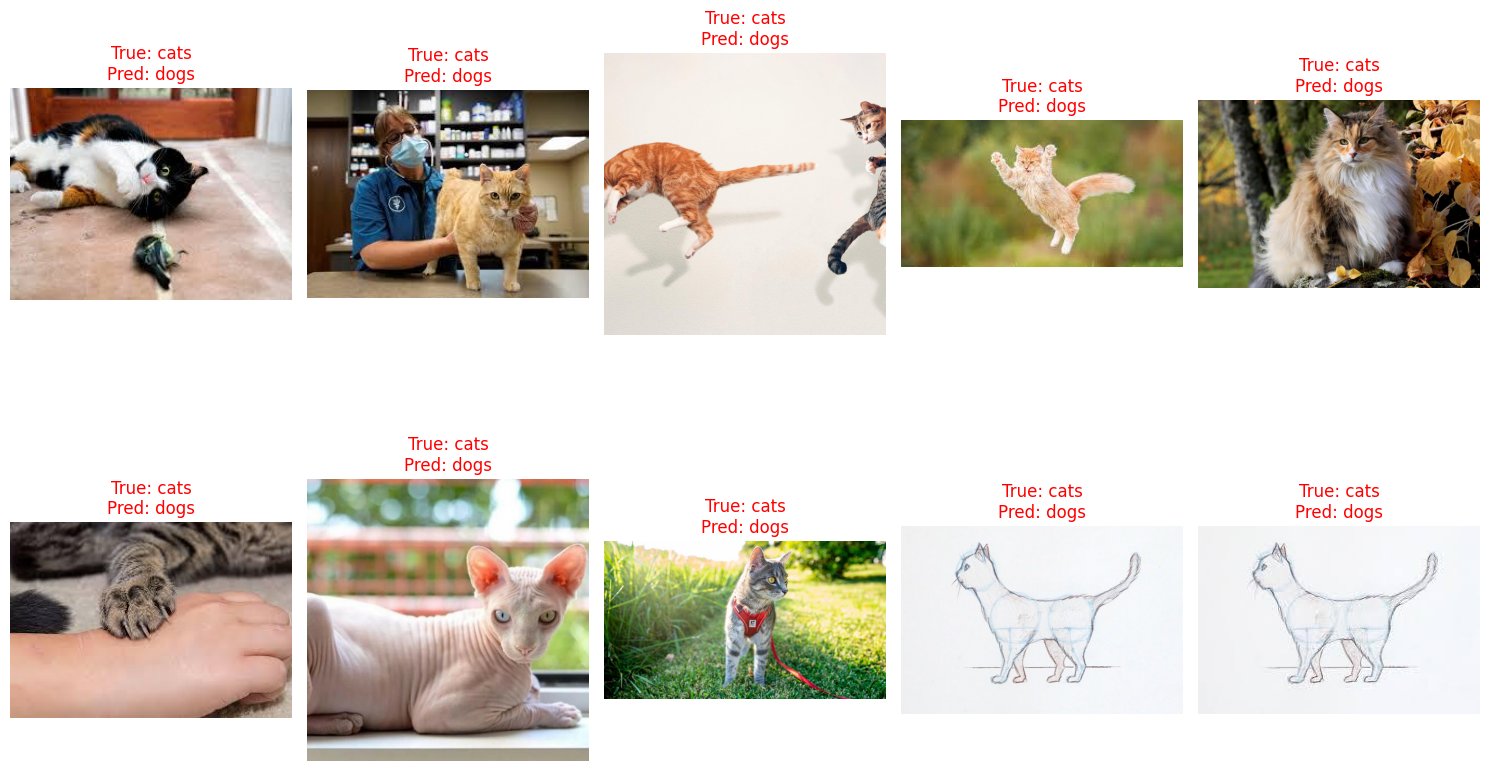

In [116]:
# Assume the previous cells have been run, including model training, tuning, and evaluation.

# --- Analyze Misclassified Images ---
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

print("\n--- Analyzing Misclassified Images ---")

# Ensure necessary variables are available
if 'test_labels' in globals() and 'test_features' in globals() and 'best_svm_model' in globals() and 'class_indices' in globals() and 'test_pred_labels_tuned' in globals():

    # Get the true and predicted labels for the tuned model
    true_labels = test_labels
    predicted_labels = test_pred_labels_tuned

    # Find the indices of misclassified images
    misclassified_indices = np.where(true_labels != predicted_labels)[0]

    print(f"Found {len(misclassified_indices)} misclassified images in the test set.")

    if len(misclassified_indices) > 0:
        # Display a few misclassified images as an example
        num_images_to_display = min(10, len(misclassified_indices)) # Display up to 10 misclassified images

        print(f"\nDisplaying {num_images_to_display} example misclassified images:")

        # Get the list of all test image file paths to load the images
        # This requires reconstructing the file paths based on the generator's order and class structure
        # A more robust way would be to get the file paths directly from flow_from_directory
        # For simplicity here, let's assume a standard directory structure like /test/class_a/img.jpg
        # You might need to adjust this based on your actual file paths and order from the generator
        # A more reliable way would be to get the list of files from the generator object if possible
        # As a workaround, let's use os.listdir recursively, but be careful about order if shuffle=True was used in the generator
        # Since shuffle=False was used for the feature extraction generator, the order should match.

        # Recreate the test generator with shuffle=False to get the filenames
        test_datagen_for_filenames = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
        test_generator_for_filenames = test_datagen_for_filenames.flow_from_directory(
            test_dir,
            target_size=(img_height, img_width),
            batch_size=1, # Use batch_size 1 to get filenames one by one or adjust as needed
            class_mode='binary',
            shuffle=False # IMPORTANT: Must match the shuffle=False used during feature extraction
        )
        test_image_filenames = [os.path.join(test_dir, fname) for fname in test_generator_for_filenames.filenames]


        # Prepare class name mapping
        inverse_class_indices = {v: k for k, v in class_indices.items()}


        plt.figure(figsize=(15, 10))
        for i, misclassified_idx in enumerate(misclassified_indices[:num_images_to_display]):
            plt.subplot(2, 5, i + 1) # Adjust subplot grid based on num_images_to_display
            # Load the actual image file
            try:
                img_path = test_image_filenames[misclassified_idx]
                img = Image.open(img_path)
                plt.imshow(img)
                plt.axis('off')
                true_class = inverse_class_indices[int(true_labels[misclassified_idx])]
                predicted_class = inverse_class_indices[int(predicted_labels[misclassified_idx])]
                plt.title(f"True: {true_class}\nPred: {predicted_class}", color='red')
            except Exception as e:
                print(f"Could not display image at index {misclassified_idx}: {e}")
                plt.title("Error loading image")

        plt.tight_layout()
        plt.show()

    else:
        print("No misclassified images found.")

else:
    print("\nNecessary variables for misclassification analysis not found. Please run previous cells.")

In [117]:
# Assume the previous cells have been run, including the SVM hyperparameter tuning.

# --- Save the Best Tuned SVM model ---
import joblib
import os

# Define a path to save the tuned model
tuned_model_save_path = '/content/tuned_svm_model.pkl'

# Ensure the tuned model was found by GridSearchCV
if 'best_svm_model' in globals():
    print(f"\nSaving tuned SVM model to {tuned_model_save_path}...")
    joblib.dump(best_svm_model, tuned_model_save_path)
    print("Tuned SVM model saved.")
else:
    print("\nBest tuned SVM model not found. Please run the hyperparameter tuning cell first.")

# You can now load this tuned model later using joblib.load(tuned_model_save_path)


Saving tuned SVM model to /content/tuned_svm_model.pkl...
Tuned SVM model saved.


In [118]:
# Assume the previous cells have been run, including saving the tuned SVM model.

# --- Load the Tuned SVM Model and Make a Prediction ---
import joblib
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Need tensorflow for the base_model (VGG16)

# Define the path to the saved tuned model
tuned_model_save_path = '/content/tuned_svm_model.pkl' # Make sure this matches the save path

# Define the path to a new image for prediction
new_image_path = '/content/archive/test/dog/some_other_dog_image.jpg' # Replace with the actual path to a new image

# Define image dimensions (must match what was used for feature extraction)
img_height, img_width = 224, 224

# Ensure the necessary base_model (VGG16) is loaded for feature extraction
# This assumes base_model was defined in a previous cell and is in memory.
# If you are running this in a new session, you would need to redefine and load the base_model:
# base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Ensure class_indices is available to map prediction index to class name
# If you are running this in a new session, you would need to recreate the generator to get class_indices:
# train_datagen_for_indices = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# train_generator_for_indices = train_datagen_for_indices.flow_from_directory(
#     train_dir, # You would need train_dir path here
#     target_size=(img_height, img_width),
#     batch_size=1,
#     class_mode='binary',
#     shuffle=False
# )
# class_indices = train_generator_for_indices.class_indices
# inverse_class_indices = {v: k for k, v in class_indices.items()}


if os.path.exists(tuned_model_save_path):
    print(f"\nLoading tuned SVM model from {tuned_model_save_path}...")
    loaded_tuned_svm_model = joblib.load(tuned_model_save_path)
    print("Tuned SVM model loaded successfully.")

    if os.path.exists(new_image_path):
        print(f"\nMaking prediction on new image: {new_image_path}")

        try:
            # Load and preprocess the new image
            img = Image.open(new_image_path).convert('RGB') # Ensure image is in RGB format
            img = img.resize((img_height, img_width))
            img_array = np.array(img)
            img_array = img_array / 255.0 # Rescale the pixel values

            # Add a batch dimension
            img_array = np.expand_dims(img_array, axis=0)

            # Extract features using the pre-trained CNN base model
            if 'base_model' in globals():
                 new_image_features = base_model.predict(img_array)
                 new_image_features_flattened = np.reshape(new_image_features, (1, 7 * 7 * 512))

                 # Make prediction using the loaded tuned SVM model
                 prediction = loaded_tuned_svm_model.predict(new_image_features_flattened)

                 # Interpret the prediction (assuming class_indices is available)
                 if 'class_indices' in globals():
                     predicted_class_index = int(prediction[0])
                     # Ensure inverse_class_indices is also available
                     if 'inverse_class_indices' not in globals():
                          inverse_class_indices = {v: k for k, v in class_indices.items()}
                     predicted_class_name = inverse_class_indices[predicted_class_index]

                     print(f"Prediction (raw): {prediction[0]}")
                     print(f"Predicted class: {predicted_class_name}")

                     # Display the image with prediction
                     plt.imshow(img) # Use the resized PIL image for display
                     plt.title(f"Predicted: {predicted_class_name}")
                     plt.axis('off')
                     plt.show()

                 else:
                     print("\n'class_indices' variable not found. Cannot map prediction to class name.")
                     print(f"Raw prediction: {prediction[0]}")

            else:
                print("\n'base_model' variable not found. Cannot extract features.")

        except Exception as e:
            print(f"An error occurred during prediction on the new image: {e}")

    else:
        print(f"\nNew image not found at {new_image_path}. Skipping prediction on new image.")

else:
    print(f"\nSaved tuned model not found at {tuned_model_save_path}. Please run the hyperparameter tuning and saving cells first.")


Loading tuned SVM model from /content/tuned_svm_model.pkl...
Tuned SVM model loaded successfully.

New image not found at /content/archive/test/dog/some_other_dog_image.jpg. Skipping prediction on new image.



--- Analyzing GridSearchCV Results ---
Key GridSearchCV Results Columns:
    param_C  param_gamma param_kernel  mean_test_score  rank_test_score
0       0.1        1.000       linear          0.84736                1
2       0.1        0.100       linear          0.84736                1
6       0.1        0.001       linear          0.84736                1
4       0.1        0.010       linear          0.84736                1
12      1.0        0.010       linear          0.84736                1


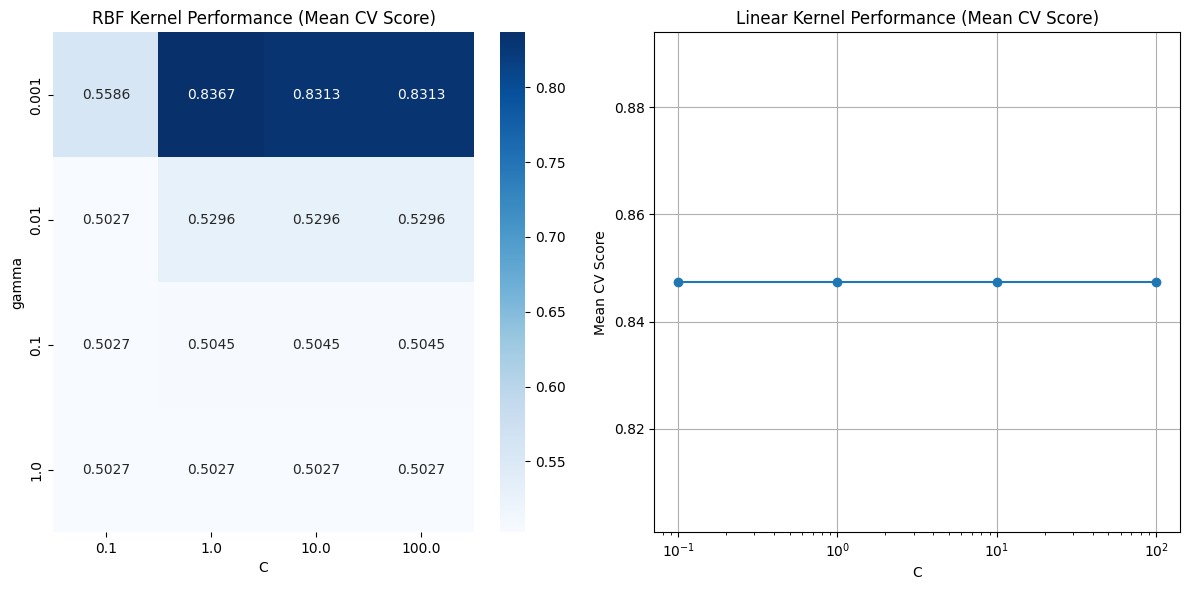

In [120]:
# Assume the previous cells have been run, including the SVM hyperparameter tuning.

# --- Analyze GridSearchCV Results ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Analyzing GridSearchCV Results ---")

# Check if grid_search object is available
if 'grid_search' in globals():
    results_df = pd.DataFrame(grid_search.cv_results_)

    # Print some key columns
    print("Key GridSearchCV Results Columns:")
    print(results_df[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head())

    # Optional: Visualize the results
    # This can be tricky with multiple parameters, but helpful for understanding trends

    # Example visualization (fix one parameter, vary others)
    # Let's look at performance for 'linear' vs 'rbf' kernel across different C and gamma values
    if 'param_C' in results_df.columns and 'param_gamma' in results_df.columns and 'param_kernel' in results_df.columns:
        plt.figure(figsize=(12, 6))

        # Separate results by kernel
        linear_results = results_df[results_df['param_kernel'] == 'linear']
        # Fix the typo here: change results_results to results_df
        rbf_results = results_df[results_df['param_kernel'] == 'rbf']

        # Plot performance for RBF kernel varying C and gamma
        if not rbf_results.empty:
            plt.subplot(1, 2, 1)
            # Pivot table for heatmap
            pivot_table_rbf = rbf_results.pivot_table(
                values='mean_test_score',
                index='param_gamma',
                columns='param_C'
            )
            sns.heatmap(pivot_table_rbf, annot=True, cmap="Blues", fmt=".4f")
            plt.title('RBF Kernel Performance (Mean CV Score)')
            plt.xlabel('C')
            plt.ylabel('gamma')

        # Plot performance for Linear kernel (only C matters significantly)
        if not linear_results.empty:
             plt.subplot(1, 2, 2)
             linear_plot_data = linear_results[['param_C', 'mean_test_score']].drop_duplicates()
             plt.plot(linear_plot_data['param_C'], linear_plot_data['mean_test_score'], marker='o')
             plt.xscale('log') # C is often on a log scale
             plt.title('Linear Kernel Performance (Mean CV Score)')
             plt.xlabel('C')
             plt.ylabel('Mean CV Score')
             plt.grid(True)


        plt.tight_layout()
        plt.show()
    else:
        print("\nCould not visualize results. Ensure param_C, param_gamma, and param_kernel columns exist.")


else:
    print("\nGridSearchCV results not found. Please run the hyperparameter tuning cell first.")